In [1]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import ClassifierChain
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn import tree
import matplotlib
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from pprint import pprint

from keras.models import Sequential

In [2]:
X_train = pd.read_csv(r'C:\Users\GEM001\DSCI_601-1\MSR 2022\Train_Features.csv', index_col=0)
y_train = pd.read_csv(r'C:\Users\GEM001\DSCI_601-1\MSR 2022\Train_Labels.csv', index_col=0)
X_test = pd.read_csv(r'C:\Users\GEM001\DSCI_601-1\MSR 2022\Test_Features.csv', index_col=0)
y_test = pd.read_csv(r'C:\Users\GEM001\DSCI_601-1\MSR 2022\Test_Labels.csv', index_col=0)

In [3]:
categories = list(y_train.columns)
print(categories)
print(y_test.sum())

['Change Attribute Type', 'Change Parameter Type', 'Change Return Type', 'Change Variable Type', 'Move Class', 'Rename Attribute', 'Rename Class', 'Rename Method', 'Rename Parameter', 'Rename Variable']
Change Attribute Type    409
Change Parameter Type    345
Change Return Type       322
Change Variable Type     409
Move Class               262
Rename Attribute         280
Rename Class             243
Rename Method            376
Rename Parameter         318
Rename Variable          386
dtype: int64


In [8]:
#Random search
clf=RandomForestClassifier(class_weight='balanced',n_estimators= 300,min_samples_split=2,min_samples_leaf=1,max_features=2
                          ,max_depth=None,bootstrap=False)


In [4]:
#grid search
clf=RandomForestClassifier(n_estimators= 400,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
                          ,max_depth=None,bootstrap=False)


In [14]:
#our function
clf=RandomForestClassifier(class_weight='balanced',n_estimators= 1000,min_samples_split=2,min_samples_leaf=1,max_features='auto'
                          ,max_depth=None,bootstrap=True)


In [9]:
classifierChain = ClassifierChain(clf)


In [10]:
classifierChain.fit(X_train, y_train)
y_pred = classifierChain.predict(X_train)
#print(classification_report(y_pred, y_train))

In [11]:
y_pred = classifierChain.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       410
           1       0.70      0.72      0.71       338
           2       0.66      0.70      0.68       302
           3       0.73      0.75      0.74       397
           4       0.69      0.73      0.71       248
           5       0.68      0.74      0.71       258
           6       0.70      0.73      0.71       231
           7       0.73      0.83      0.78       329
           8       0.64      0.72      0.68       285
           9       0.72      0.75      0.73       373

   micro avg       0.70      0.74      0.72      3171
   macro avg       0.70      0.74      0.72      3171
weighted avg       0.70      0.74      0.72      3171
 samples avg       0.65      0.62      0.61      3171



C:\Users\GEM001\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
pprint(classifierChain.get_params())


{'classifier': RandomForestClassifier(class_weight='balanced'),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_impurity_split': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'order': None,
 'require_dense': [True, True]}


In [14]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf=RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [28]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': [2,3],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf =RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(X_train, y_train)


In [30]:
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'bootstrap': False,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

[[309  99]
 [100 330]]


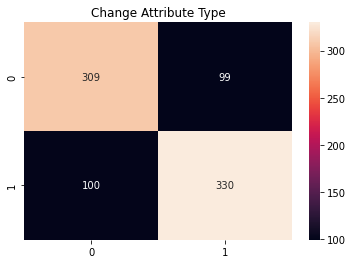

[[242  91]
 [103 402]]


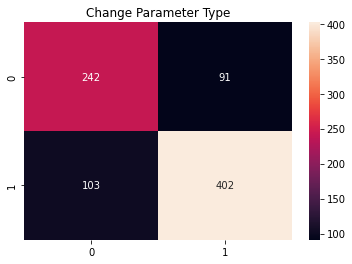

[[212  88]
 [110 428]]


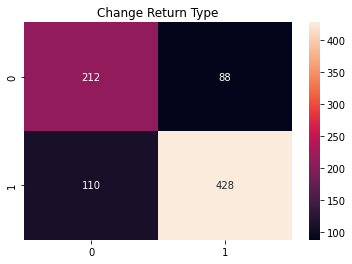

[[299  94]
 [110 335]]


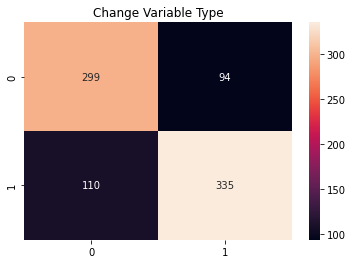

[[182  67]
 [ 80 509]]


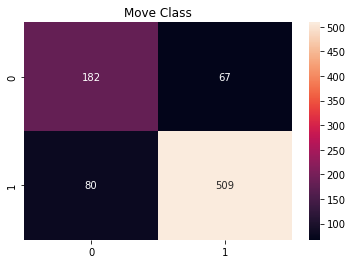

[[189  70]
 [ 91 488]]


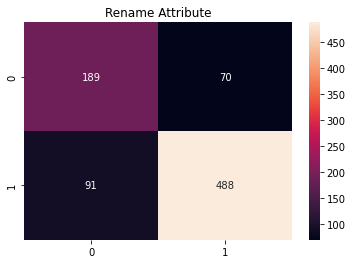

[[169  59]
 [ 74 536]]


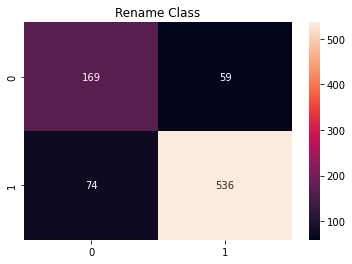

[[277  56]
 [ 99 406]]


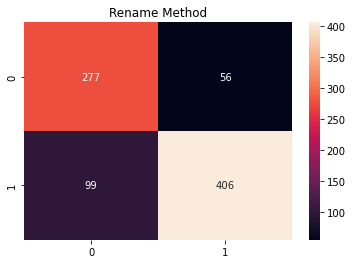

[[203  79]
 [115 441]]


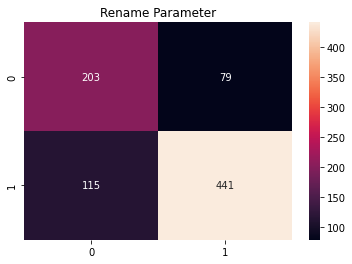

[[274  92]
 [112 360]]


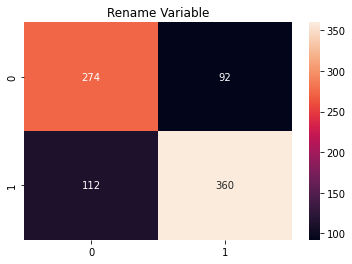

In [9]:

y_test.sum(axis = 1).sum()
from sklearn.metrics import confusion_matrix

pred  = np.array(y_pred.toarray())


dfpred = pd.DataFrame(pred, columns = categories)

import seaborn as sns

for x in categories:
    print(confusion_matrix( dfpred[x],y_test[x],labels = [1,0]))
    sns.heatmap(confusion_matrix(dfpred[x],y_test[x] ,labels = [1,0]), annot=True, fmt='g')
    plt.title(x)
    plt.show()
    